## Customer Booking

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# import the data
df = pd.read_csv('../data/customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<Axes: xlabel='booking_complete'>

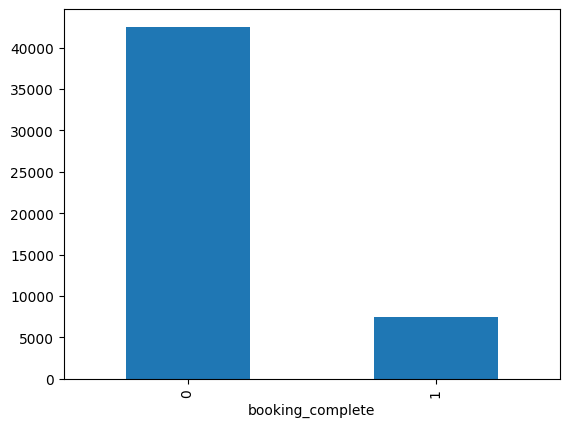

In [5]:
import matplotlib.pyplot as plt
df['booking_complete'].value_counts().plot(kind='bar')

In [6]:
df['booking_complete'].value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

In [7]:
df['trip_type'].value_counts(normalize=True)

trip_type
RoundTrip     0.98994
OneWay        0.00774
CircleTrip    0.00232
Name: proportion, dtype: float64

In [8]:
df['booking_origin'].value_counts(normalize=True)

booking_origin
Australia               0.35744
Malaysia                0.14348
South Korea             0.09118
Japan                   0.07770
China                   0.06774
                         ...   
Ghana                   0.00002
Gibraltar               0.00002
Guatemala               0.00002
Algeria                 0.00002
Svalbard & Jan Mayen    0.00002
Name: proportion, Length: 104, dtype: float64

In [9]:
len(df['num_passengers'].unique())

9

#### Quick Notes on First Look

+ Classification task - predict booking - already encoded for us
+ imbalanced dataset - booking = 1 is minority (callibrate or stratify/resample?)
+ wants_extra_baggage already encoded
+ wants_preferred_seat already encoded
+ wants_inflight_meals already encoded
+ trip_type has to be encoded (or dropped due to cardinality)
+ can most likely drop booking_origin if Australia isnt telling, if so, encode Australia or not Australia
+ plot num_passengers vs booking
+ plot flight duration color coded with booking

In [10]:
# describe
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


#### Purchase Lead

It seems like a lower purchase lead may indicate a better chance of booking.

In [11]:
df['booked'] = df['booking_complete'].astype(str)
fig = px.scatter(data_frame=df, y = 'purchase_lead',
                 color = 'booked',
                 labels={'y': 'Binary Variable'})

fig.show()

The results of the t-test also show that longer lead times indicate a higher chance of not booking with the airline which makes sense.

In [12]:
from scipy.stats import ttest_ind

# Separate the data into two groups
group1 = df[df['booking_complete'] == 1]['purchase_lead']
group2 = df[df['booking_complete'] == 0]['purchase_lead']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -4.94969640111078, P-value: 7.457066331761684e-07


#### Trip Type

Since 98% of our data consists of the same trip type we will delete this variable.

In [13]:
# drop trip type due to high cardinality
df.drop(columns='trip_type', axis = 1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   purchase_lead          50000 non-null  int64  
 3   length_of_stay         50000 non-null  int64  
 4   flight_hour            50000 non-null  int64  
 5   flight_day             50000 non-null  object 
 6   route                  50000 non-null  object 
 7   booking_origin         50000 non-null  object 
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  booked                 50000 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

#### Booking Origin

As we saw earlier, 35% of the **booking_origin** came from Australia and the rest were very sparse. When we pinpoint those from Australia we see there is a 95% chance that they will not book. When we exclude these customers, there is only a 79% chance they do not book and the chi2 test tells us that this is a statistically significant difference. For this reason, we can change this variable to a binary predictor where 1 = Australia and 0 = not Australia.

In [15]:
# lets deal with australia
australia = df.loc[df['booking_origin'] == 'Australia']
australia


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booked
766,1,Internet,107,23,12,Sun,AKLKUL,Australia,1,0,1,8.83,1,1
1127,1,Internet,300,63,2,Fri,AKLKUL,Australia,0,0,0,8.83,0,0
1623,1,Mobile,11,32,12,Fri,AKLKUL,Australia,0,0,0,8.83,0,0
1791,2,Internet,43,17,12,Tue,AKLKUL,Australia,1,0,1,8.83,0,0
1821,1,Internet,55,21,21,Mon,AKLKUL,Australia,0,1,1,8.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,0
49996,1,Internet,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,0
49997,1,Internet,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,0
49998,1,Internet,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,0


In [16]:
australia['booking_complete'].value_counts(normalize=True)

booking_complete
0    0.949642
1    0.050358
Name: proportion, dtype: float64

In [17]:
# not australia
not_australia = df[df['booking_origin'] != 'Australia']
not_australia

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booked
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,2,Internet,41,6,4,Tue,PENTPE,Malaysia,1,0,0,4.67,0,0
49980,4,Internet,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00,1,1
49981,1,Internet,317,6,1,Thu,PENXIY,Malaysia,1,0,1,5.00,0,0
49982,2,Internet,177,6,8,Thu,PENXIY,Malaysia,1,1,0,5.00,0,0


In [18]:
not_australia['booking_complete'].value_counts(normalize=True)

booking_complete
0    0.795256
1    0.204744
Name: proportion, dtype: float64

In [19]:
import scipy.stats as stats

# Add a binary category for Australia
df['is_australia'] = (df['booking_origin'] == 'Australia').astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['is_australia'], df['booking_complete'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 2150.7766049440315
P-value: 0.0


In [20]:
contingency_table

booking_complete,0,1
is_australia,,
0,25550,6578
1,16972,900


In [21]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booked,is_australia
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,0
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,0
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,0
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,0
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,0


In [22]:
df.drop(columns = 'booking_origin', axis = 1, inplace = True)

In [23]:
# contingency table
def contingency(df, x, y):
    '''create a contingency table for the given columns'''
    cross_tab = pd.crosstab(df[x], df[y])
    return cross_tab

contingency(df, 'wants_extra_baggage', 'booking_complete')

booking_complete,0,1
wants_extra_baggage,,
0,14656,1905
1,27866,5573


In [24]:
# contingency table
def contingency(df, x, y):
    '''create a contingency table for the given columns'''
    cross_tab = pd.crosstab(df[x], df[y])
    return cross_tab

contingency(df, 'wants_preferred_seat', 'booking_complete')

booking_complete,0,1
wants_preferred_seat,,
0,30303,4849
1,12219,2629


In [27]:
# Create the contingency table
cross_tab = contingency(df, 'wants_preferred_seat', 'booking_complete')

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 125.27310853832702
P-value: 4.4350760727496255e-29


In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['wants_preferred_seat'])

# Melt the contingency table
melted_table = contingency_table.reset_index().melt(id_vars='booking_complete', var_name='wants_preferred_seat', value_name='count')

# Generate the bar chart
fig = px.bar(melted_table, x='booking_complete', y='count', color='wants_preferred_seat',
             title='Booking Complete vs Wants Preferred Seat',
             labels={'booking_complete': 'Booking Complete', 'count': 'Count', 'wants_preferred_seat': 'Wants Preferred Seat'},
             barmode='group')

fig.show()

The contingency table and following chi2 values tell us that there is a significant difference in the association between wanting extra baggage and not wanting extra baggage.

In [26]:
# Create the contingency table
cross_tab = contingency(df, 'wants_extra_baggage', 'booking_complete')

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 231.73706388226566
P-value: 2.491861960070551e-52
